In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df=pd.read_csv(r"D:\Excel\Movies_gross_rating.csv")
print(df)

     index  MovieID                                Title MPAA Rating  \
0        0        1                   Look Who's Talking       PG-13   
1        1        2                   Driving Miss Daisy          PG   
2        2        3                       Turner & Hooch          PG   
3        3        4           Born on the Fourth of July           R   
4        4        5                      Field of Dreams          PG   
..     ...      ...                                  ...         ...   
505    505      506                           Big Hero 6          PG   
506    506      507                         Interstellar       PG-13   
507    507      508  Captain America: The Winter Soldier       PG-13   
508    508      509       Dawn of the Planet of the Apes       PG-13   
509    509      510              Guardians of the Galaxy       PG-13   

        Budget      Gross Release Date            Genre  Runtime  Rating  \
0      7500000  296000000   1989-10-12          Romance    

In [3]:
print(df.head())

   index  MovieID                       Title MPAA Rating    Budget  \
0      0        1          Look Who's Talking       PG-13   7500000   
1      1        2          Driving Miss Daisy          PG   7500000   
2      2        3              Turner & Hooch          PG  13000000   
3      3        4  Born on the Fourth of July           R  14000000   
4      4        5             Field of Dreams          PG  15000000   

       Gross Release Date    Genre  Runtime  Rating  Rating Count  
0  296000000   1989-10-12  Romance       93     5.9       73638.0  
1  145793296   1989-12-13   Comedy       99     7.4       91075.0  
2   71079915   1989-07-28    Crime      100     7.2       91415.0  
3  161001698   1989-12-20      War      145     7.2       91415.0  
4   84431625   1989-04-21    Drama      107     7.5      101702.0  


In [4]:
df.shape

(510, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         510 non-null    int64  
 1   MovieID       510 non-null    int64  
 2   Title         510 non-null    object 
 3   MPAA Rating   510 non-null    object 
 4   Budget        510 non-null    int64  
 5   Gross         510 non-null    int64  
 6   Release Date  510 non-null    object 
 7   Genre         510 non-null    object 
 8   Runtime       510 non-null    int64  
 9   Rating        508 non-null    float64
 10  Rating Count  508 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 44.0+ KB


In [6]:
df.isnull().sum()

index           0
MovieID         0
Title           0
MPAA Rating     0
Budget          0
Gross           0
Release Date    0
Genre           0
Runtime         0
Rating          2
Rating Count    2
dtype: int64

In [11]:
# Fill missing ratings with median
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Rating Count'].fillna(df['Rating Count'].median(), inplace=True)

# Convert Release Date to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month
# Create additional calculated columns
df['Profit'] = df['Gross'] - df['Budget']
df['ROI'] = (df['Profit'] / df['Budget']) * 100
df['Budget_Million'] = df['Budget'] / 1000000
df['Gross_Million'] = df['Gross'] / 1000000
df['Profit_Million'] = df['Profit'] / 1000000
# Clean Genre column (take first genre if multiple)
df['Primary_Genre'] = df['Genre'].str.split('/').str[0].str.strip()

print("Data cleaning completed!")
print(f"Final dataset shape: {df.shape}")


Data cleaning completed!
Final dataset shape: (510, 19)


In [12]:
# Basic statistics after cleaning
print("Key Statistics (in millions):")
print(f"Average Budget: ${df['Budget_Million'].mean():.2f}M")
print(f"Average Gross: ${df['Gross_Million'].mean():.2f}M")
print(f"Average Profit: ${df['Profit_Million'].mean():.2f}M")
print(f"Average ROI: {df['ROI'].mean():.2f}%")
print(f"Average Rating: {df['Rating'].mean():.2f}")
print(f"Average Runtime: {df['Runtime'].mean():.0f} minutes")

# Year range
print(f"\nData spans from {df['Year'].min()} to {df['Year'].max()}")

# Top performers
print("\nTOP 5 HIGHEST GROSSING MOVIES:")
top_gross = df.nlargest(5, 'Gross')[['Title', 'Gross_Million', 'Year']]
for idx, row in top_gross.iterrows():
    print(f"{row['Title']} ({row['Year']}) - ${row['Gross_Million']:.1f}M")

print("\nTOP 5 MOST PROFITABLE MOVIES:")
top_profit = df.nlargest(5, 'Profit')[['Title', 'Profit_Million', 'Year']]
for idx, row in top_profit.iterrows():
    print(f"{row['Title']} ({row['Year']}) - ${row['Profit_Million']:.1f}M profit")

print("\nTOP 5 HIGHEST ROI MOVIES:")
top_roi = df.nlargest(5, 'ROI')[['Title', 'ROI', 'Budget_Million', 'Year']]
for idx, row in top_roi.iterrows():
    print(f"{row['Title']} ({row['Year']}) - {row['ROI']:.1f}% ROI (${row['Budget_Million']:.1f}M budget)")

Key Statistics (in millions):
Average Budget: $84.30M
Average Gross: $383.20M
Average Profit: $298.90M
Average ROI: 1318.60%
Average Rating: 6.92
Average Runtime: 118 minutes

Data spans from 1989 to 2014

TOP 5 HIGHEST GROSSING MOVIES:
Avatar (2009) - $2788.0M
Titanic (1997) - $1845.0M
The Avengers (2012) - $1519.6M
Harry Potter and the Deathly Hallows: Part 2 (2011) - $1342.0M
Frozen (2013) - $1274.2M

TOP 5 MOST PROFITABLE MOVIES:
Avatar (2009) - $2551.0M profit
Titanic (1997) - $1645.0M profit
The Avengers (2012) - $1299.6M profit
Harry Potter and the Deathly Hallows: Part 2 (2011) - $1217.0M profit
Frozen (2013) - $1124.2M profit

TOP 5 HIGHEST ROI MOVIES:
The Blair Witch Project (1999) - 413233.3% ROI ($0.1M budget)
My Big Fat Greek Wedding (2002) - 7274.9% ROI ($5.0M budget)
Look Who's Talking (1989) - 3846.7% ROI ($7.5M budget)
Pretty Woman (1990) - 3207.1% ROI ($14.0M budget)
Juno (2007) - 2985.5% ROI ($7.5M budget)


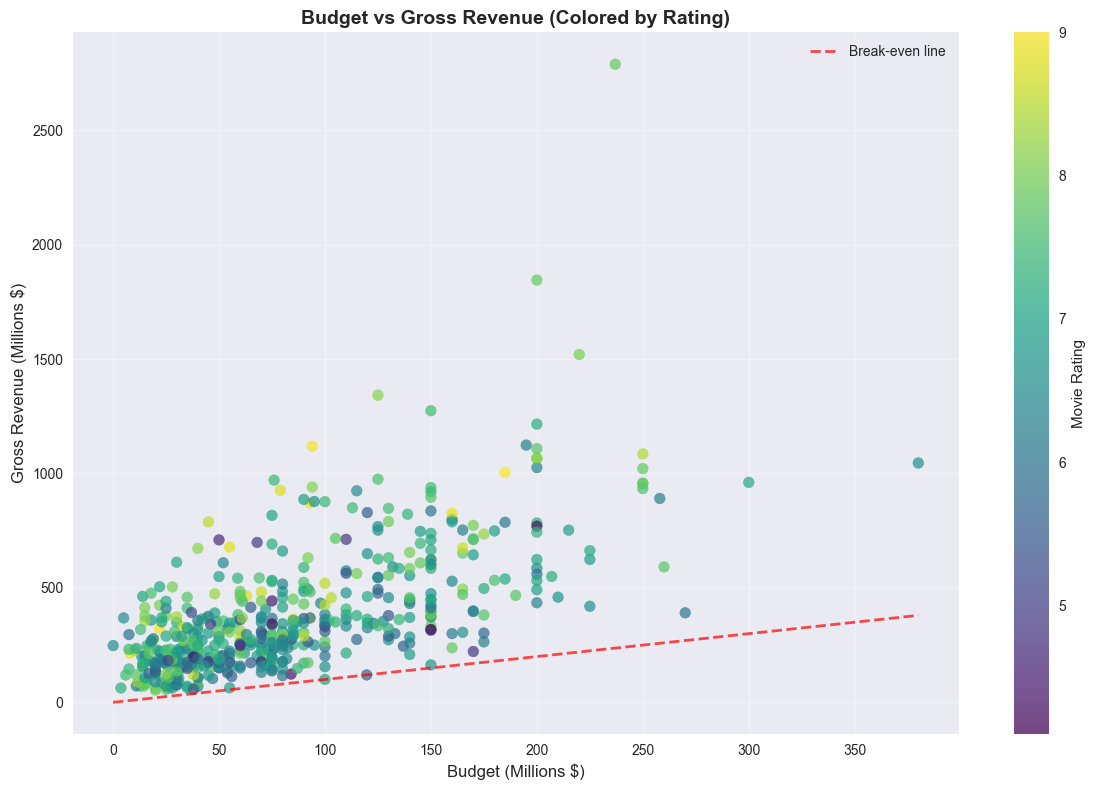

In [13]:
# 1. SCATTER PLOT - Budget vs Gross Revenue
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Budget_Million'], df['Gross_Million'], 
                     c=df['Rating'], cmap='viridis', alpha=0.7, s=60)
plt.colorbar(scatter, label='Movie Rating')
plt.xlabel('Budget (Millions $)', fontsize=12)
plt.ylabel('Gross Revenue (Millions $)', fontsize=12)
plt.title('Budget vs Gross Revenue (Colored by Rating)', fontsize=14, fontweight='bold')
plt.plot([0, df['Budget_Million'].max()], [0, df['Budget_Million'].max()], 
         'r--', alpha=0.7, linewidth=2, label='Break-even line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

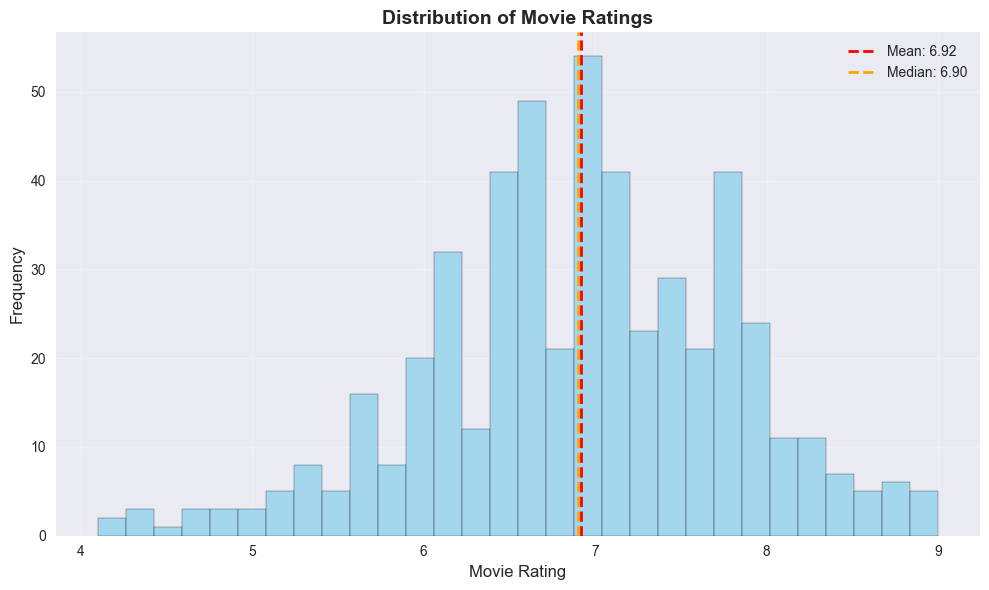

In [14]:
# 2. HISTOGRAM - Movie Ratings Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Movie Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Movie Ratings', fontsize=14, fontweight='bold')
plt.axvline(df['Rating'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {df["Rating"].mean():.2f}')
plt.axvline(df['Rating'].median(), color='orange', linestyle='--', linewidth=2,
           label=f'Median: {df["Rating"].median():.2f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


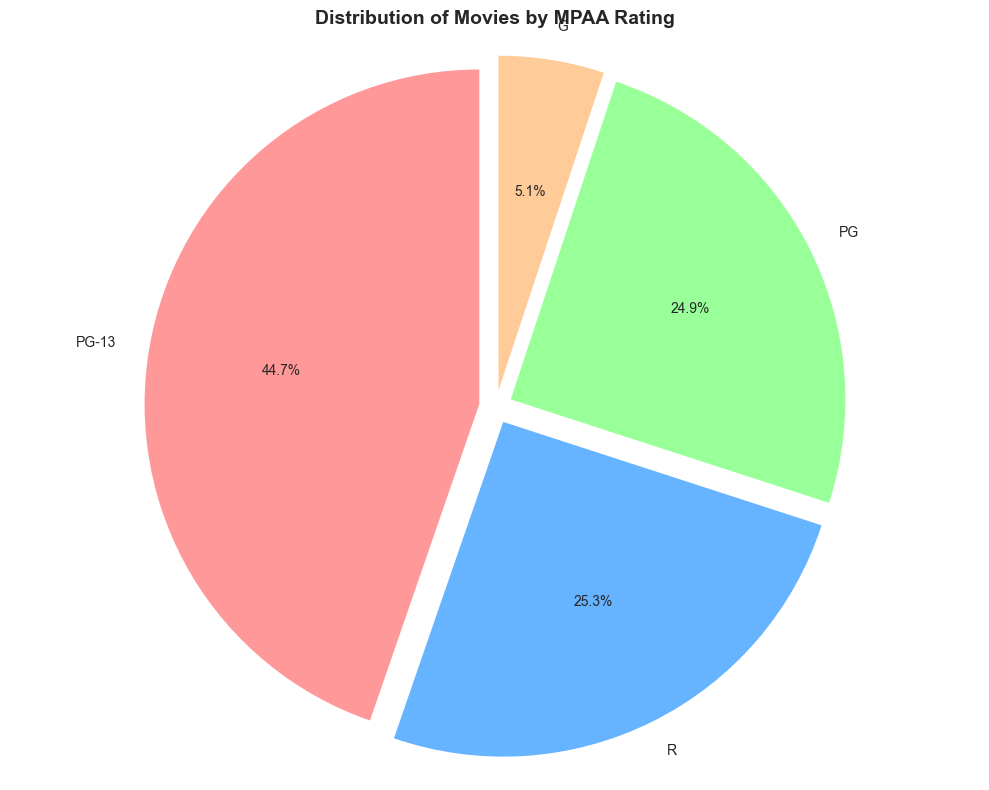

In [15]:
# 3. PIE CHART - MPAA Rating Distribution
plt.figure(figsize=(10, 8))
mpaa_counts = df['MPAA Rating'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
plt.pie(mpaa_counts.values, labels=mpaa_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, explode=[0.05]*len(mpaa_counts))
plt.title('Distribution of Movies by MPAA Rating', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

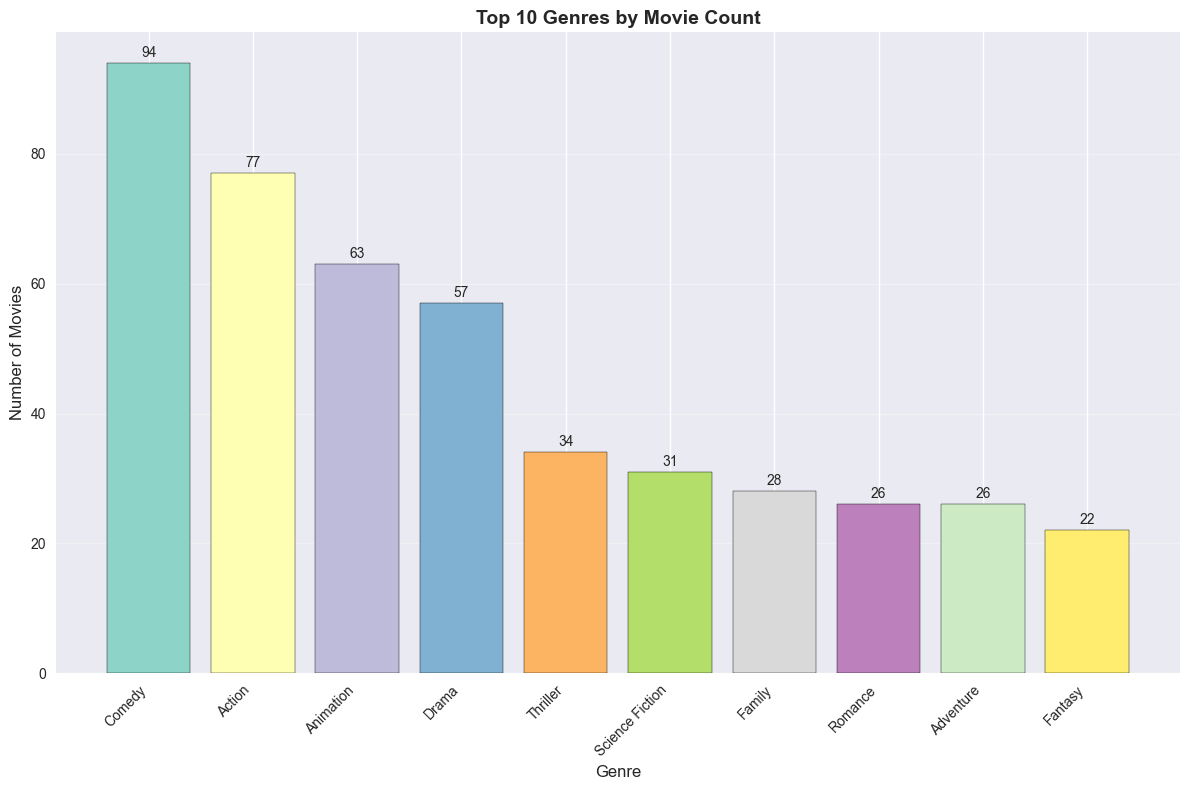

In [16]:
# 4. BAR CHART - Top Genres by Count
plt.figure(figsize=(12, 8))
genre_counts = df['Primary_Genre'].value_counts().head(10)
colors = plt.cm.Set3(np.linspace(0, 1, len(genre_counts)))
bars = plt.bar(genre_counts.index, genre_counts.values, color=colors, edgecolor='black')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Top 10 Genres by Movie Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

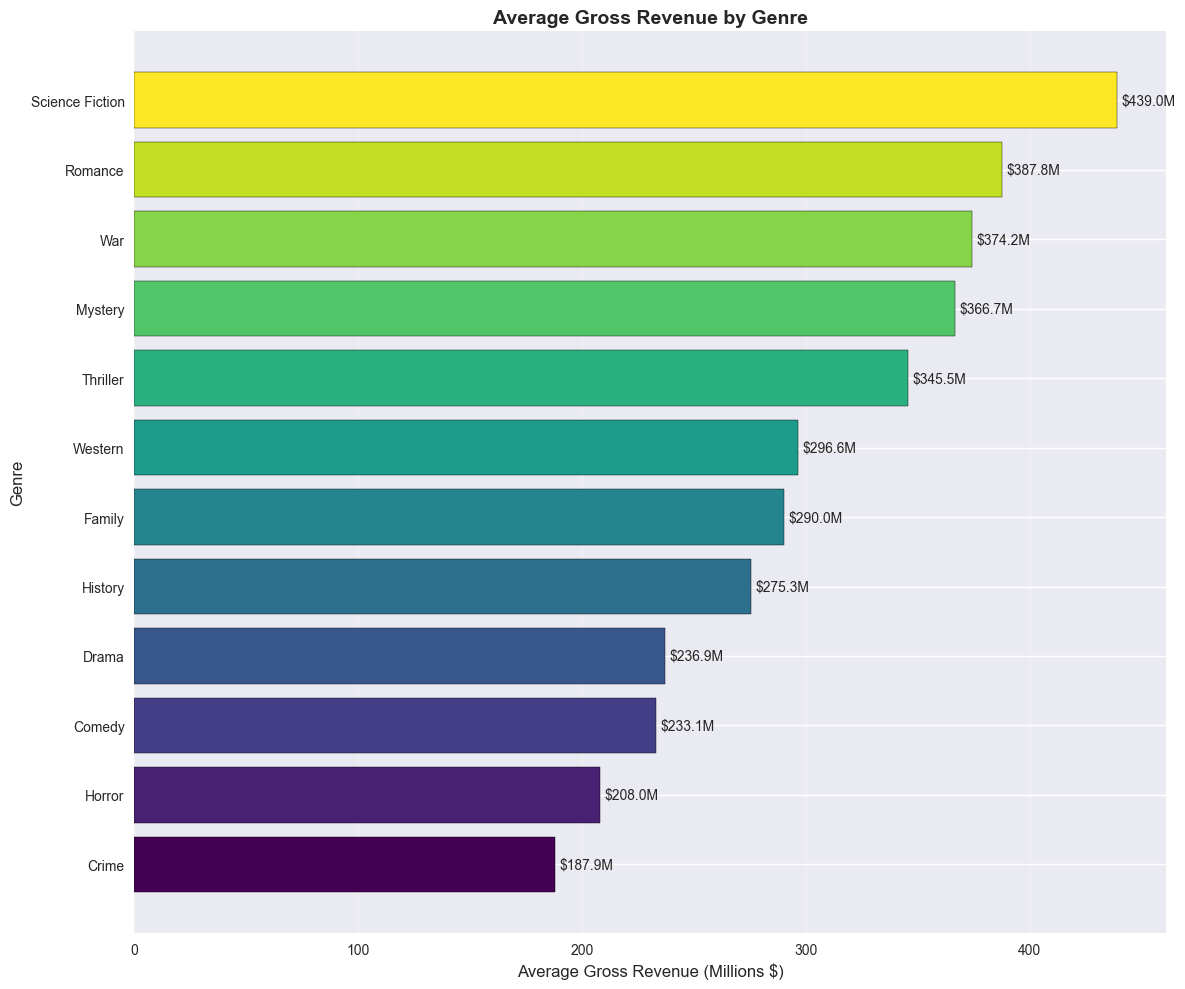

In [17]:
# 5. HORIZONTAL BAR CHART - Average Gross by Genre
plt.figure(figsize=(12, 10))
genre_gross = df.groupby('Primary_Genre')['Gross_Million'].mean().sort_values(ascending=True).head(12)
colors = plt.cm.viridis(np.linspace(0, 1, len(genre_gross)))
bars = plt.barh(genre_gross.index, genre_gross.values, color=colors, edgecolor='black')
plt.xlabel('Average Gross Revenue (Millions $)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Average Gross Revenue by Genre', fontsize=14, fontweight='bold')
# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height()/2,
             f'${width:.1f}M', ha='left', va='center')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

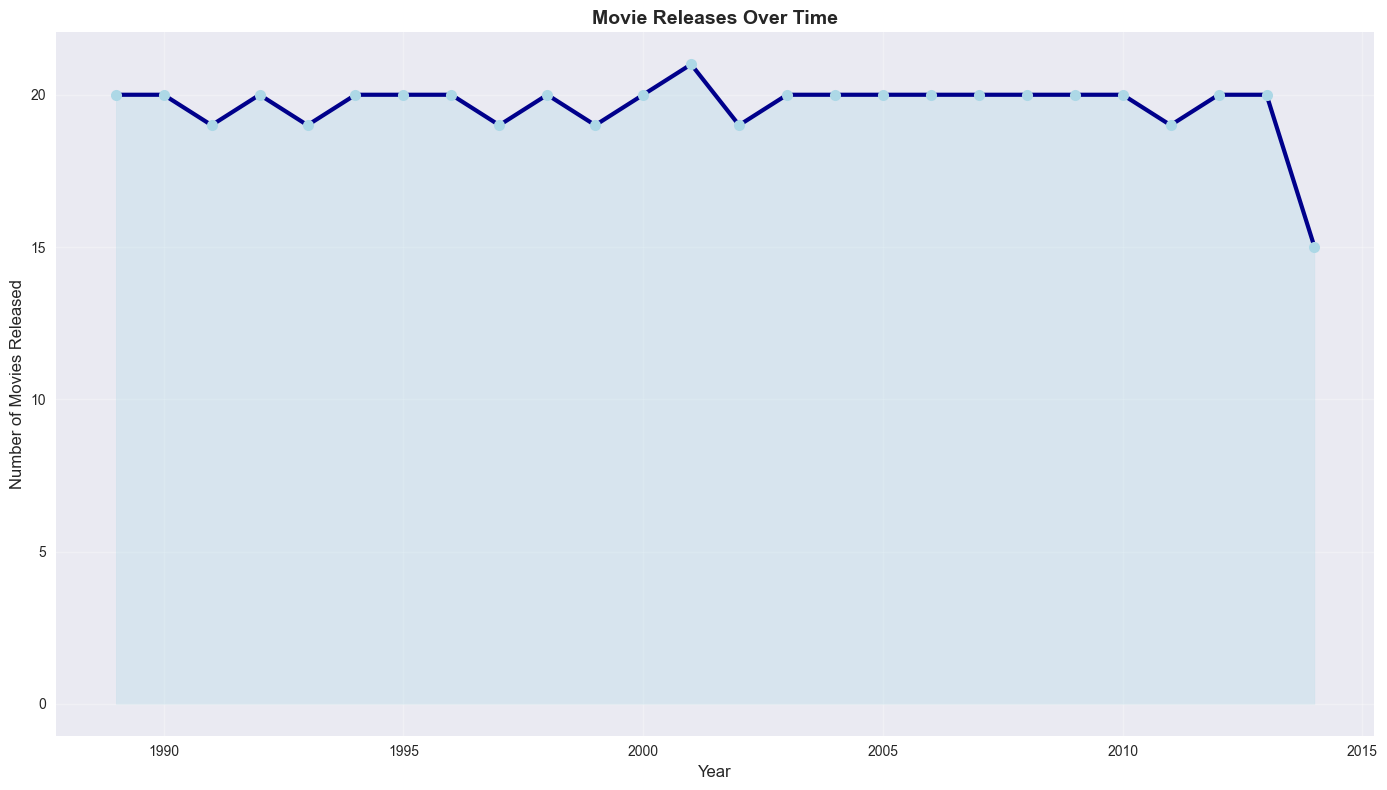

In [18]:
# 6. LINE CHART - Movies Released Over Time
plt.figure(figsize=(14, 8))
yearly_counts = df.groupby('Year').size()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=3, 
         markersize=8, color='darkblue', markerfacecolor='lightblue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies Released', fontsize=12)
plt.title('Movie Releases Over Time', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.fill_between(yearly_counts.index, yearly_counts.values, alpha=0.3, color='lightblue')
plt.tight_layout()
plt.show()


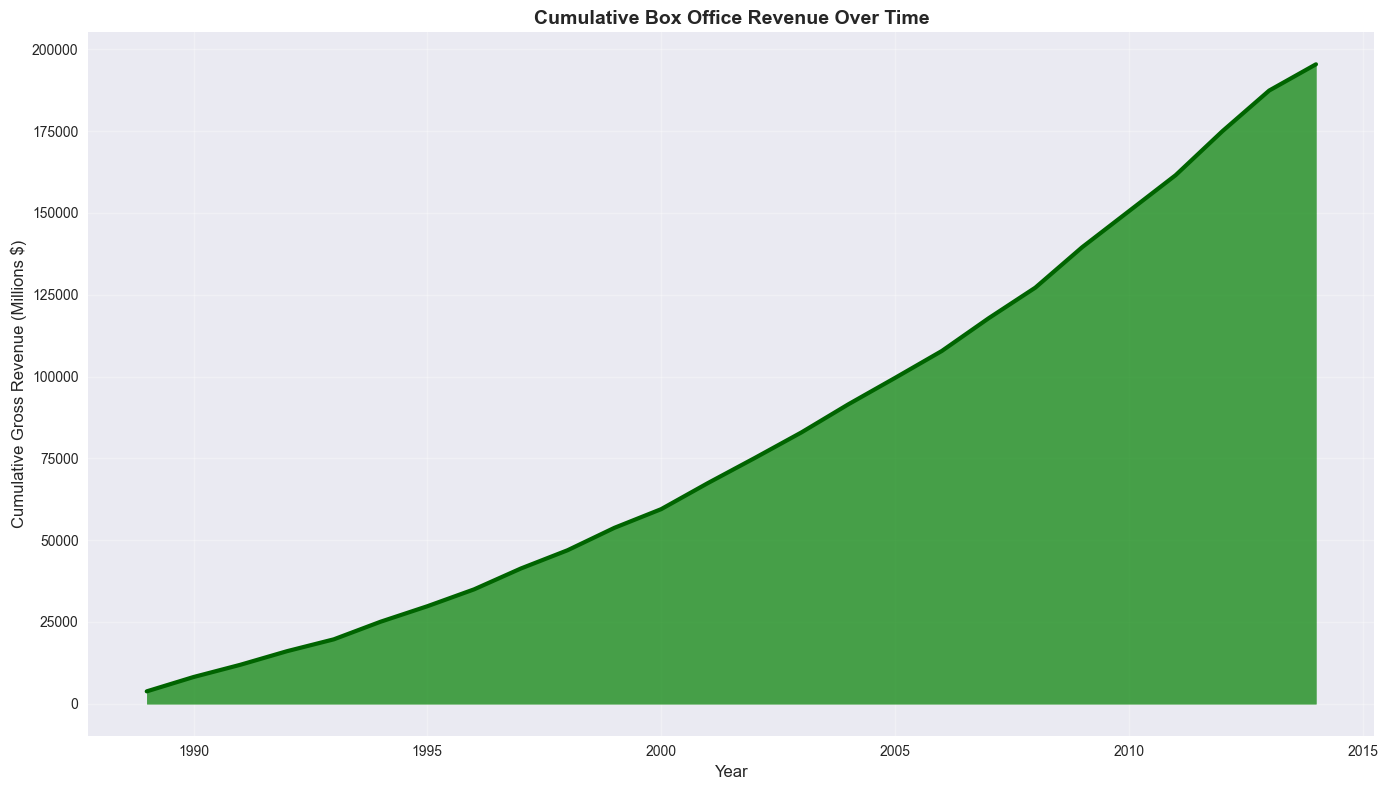

In [19]:
# 7. AREA CHART - Cumulative Revenue Over Years
plt.figure(figsize=(14, 8))
yearly_revenue = df.groupby('Year')['Gross_Million'].sum().cumsum()
plt.fill_between(yearly_revenue.index, yearly_revenue.values, alpha=0.7, color='green')
plt.plot(yearly_revenue.index, yearly_revenue.values, linewidth=3, color='darkgreen')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Gross Revenue (Millions $)', fontsize=12)
plt.title('Cumulative Box Office Revenue Over Time', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

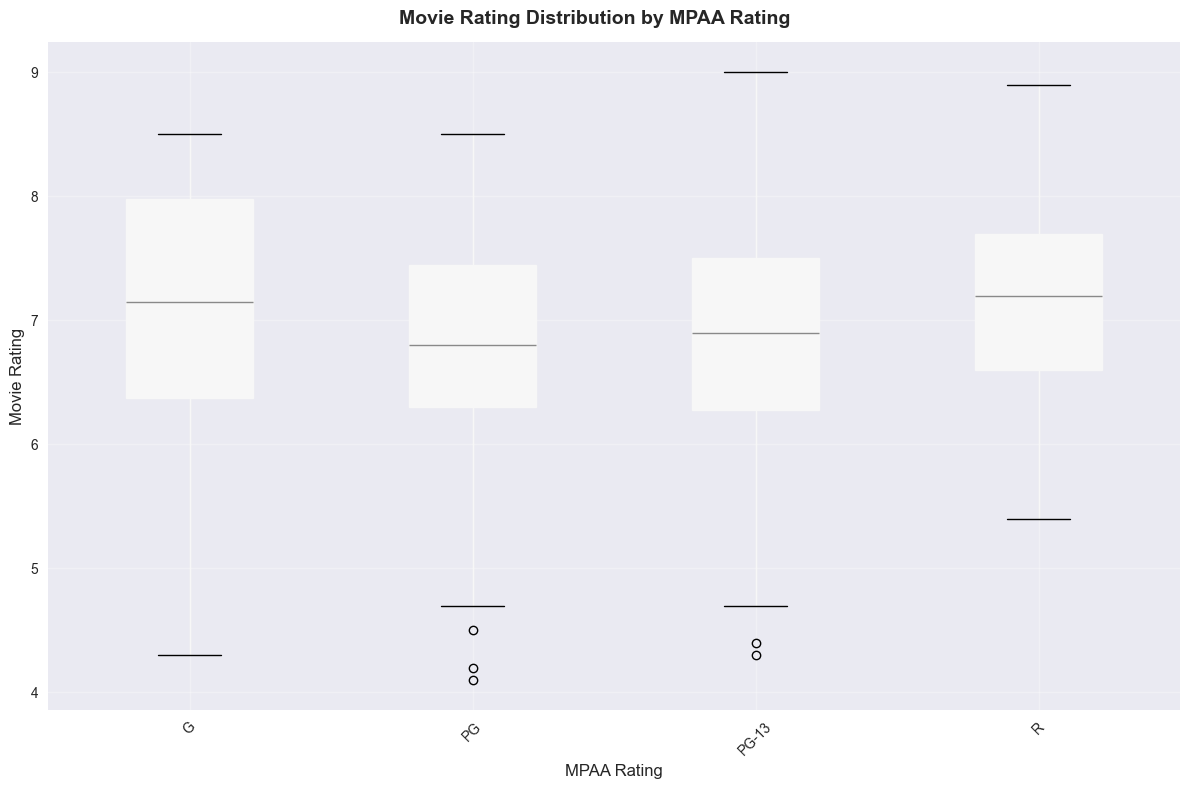

In [20]:
# 8. BOX PLOT - Rating Distribution by MPAA Rating
plt.figure(figsize=(12, 8))
df.boxplot(column='Rating', by='MPAA Rating', figsize=(12, 8), patch_artist=True)
plt.suptitle('Movie Rating Distribution by MPAA Rating', fontsize=14, fontweight='bold')
plt.xlabel('MPAA Rating', fontsize=12)
plt.ylabel('Movie Rating', fontsize=12)
plt.title('')  # Remove automatic title
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

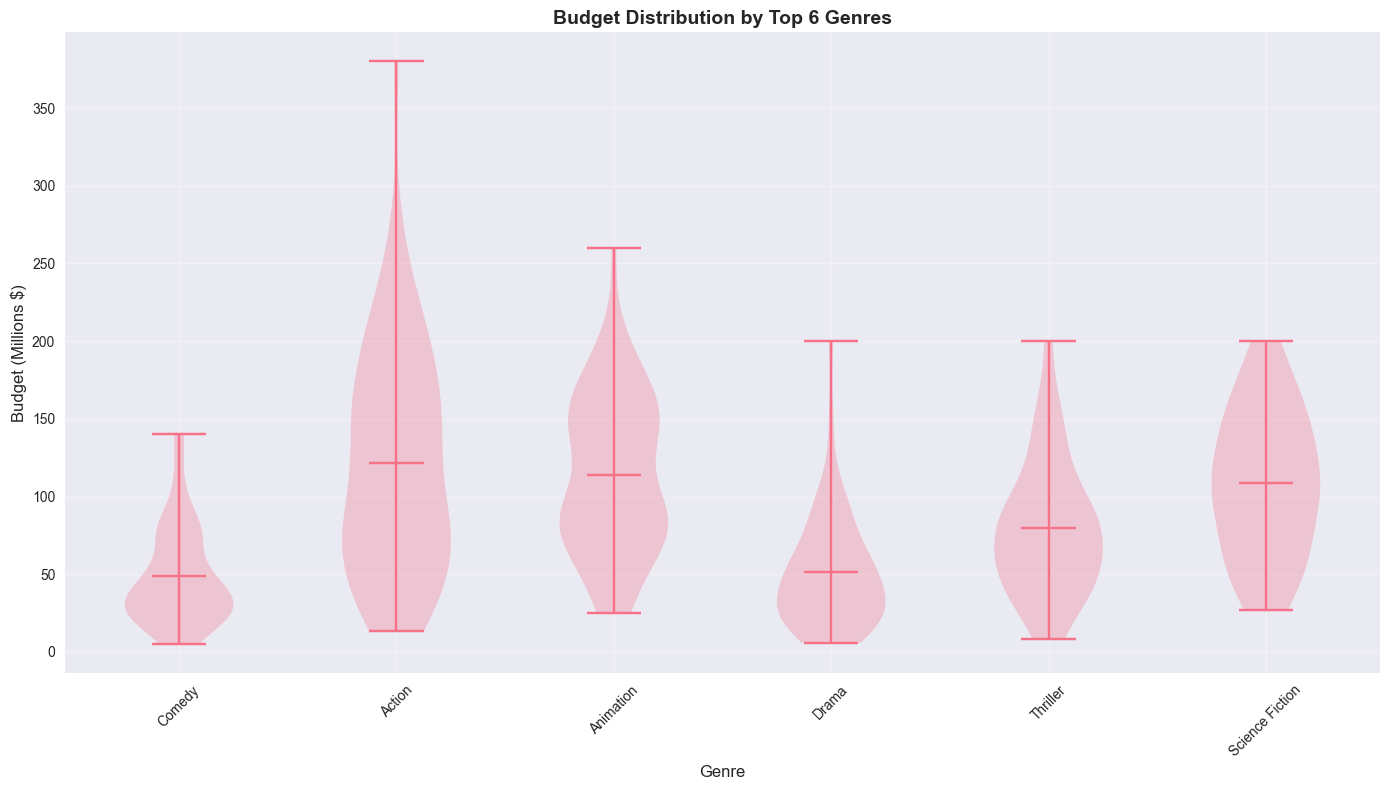

In [21]:
# 9. VIOLIN PLOT - Budget Distribution by Genre
plt.figure(figsize=(14, 8))
top_genres = df['Primary_Genre'].value_counts().head(6).index
df_top_genres = df[df['Primary_Genre'].isin(top_genres)]
genre_data = [df_top_genres[df_top_genres['Primary_Genre'] == genre]['Budget_Million'].values 
              for genre in top_genres]
parts = plt.violinplot(genre_data, positions=range(len(top_genres)), showmeans=True)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Budget (Millions $)', fontsize=12)
plt.title('Budget Distribution by Top 6 Genres', fontsize=14, fontweight='bold')
plt.xticks(range(len(top_genres)), top_genres, rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

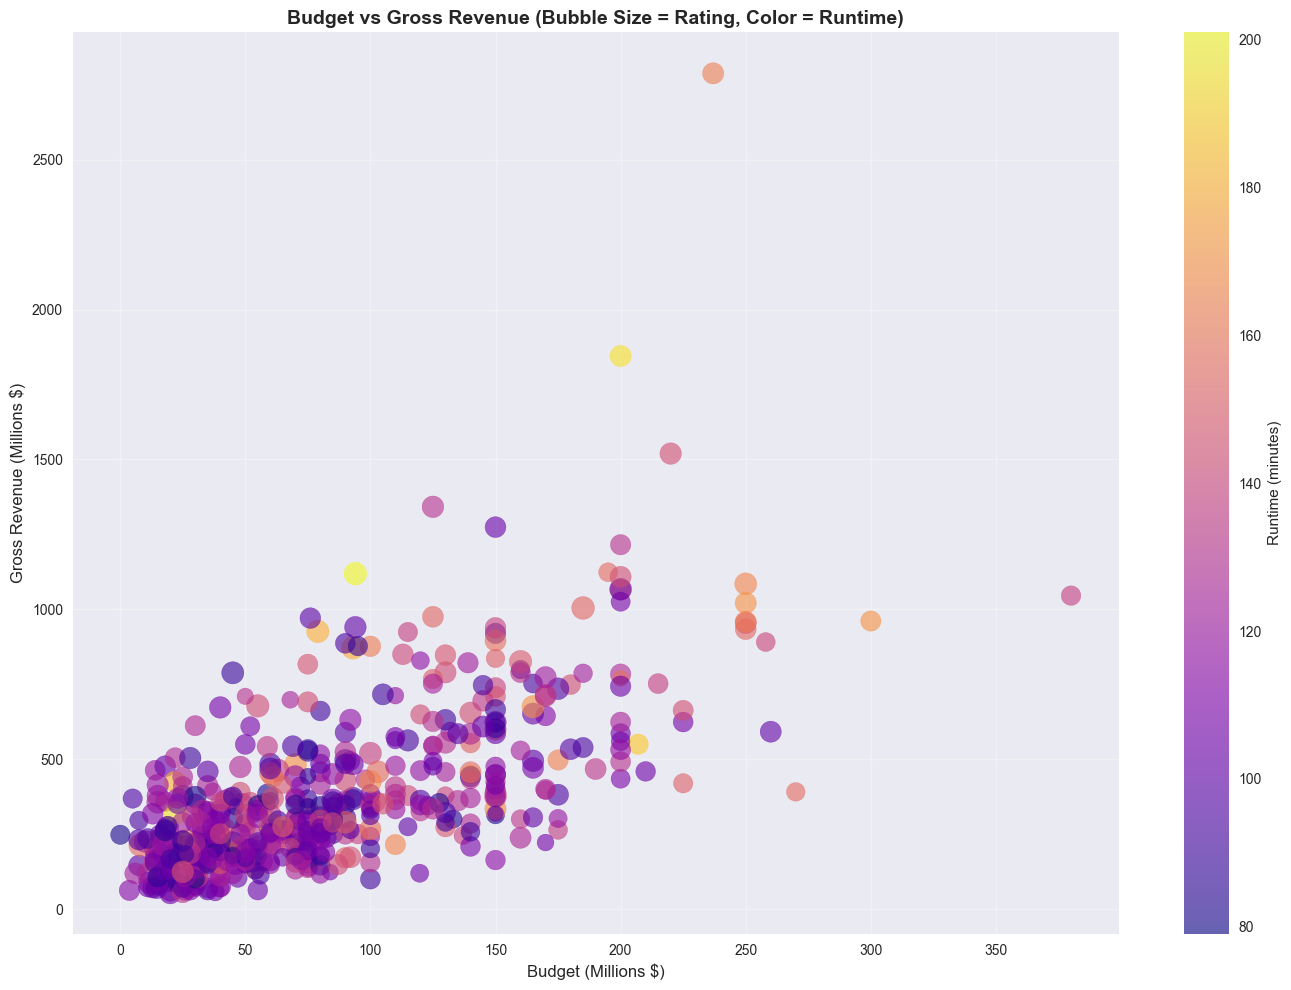

In [22]:
# 10. BUBBLE CHART - Budget vs Gross vs Rating
plt.figure(figsize=(14, 10))
bubble = plt.scatter(df['Budget_Million'], df['Gross_Million'], 
                    s=df['Rating']*30, c=df['Runtime'], cmap='plasma', alpha=0.6)
plt.colorbar(bubble, label='Runtime (minutes)')
plt.xlabel('Budget (Millions $)', fontsize=12)
plt.ylabel('Gross Revenue (Millions $)', fontsize=12)
plt.title('Budget vs Gross Revenue (Bubble Size = Rating, Color = Runtime)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

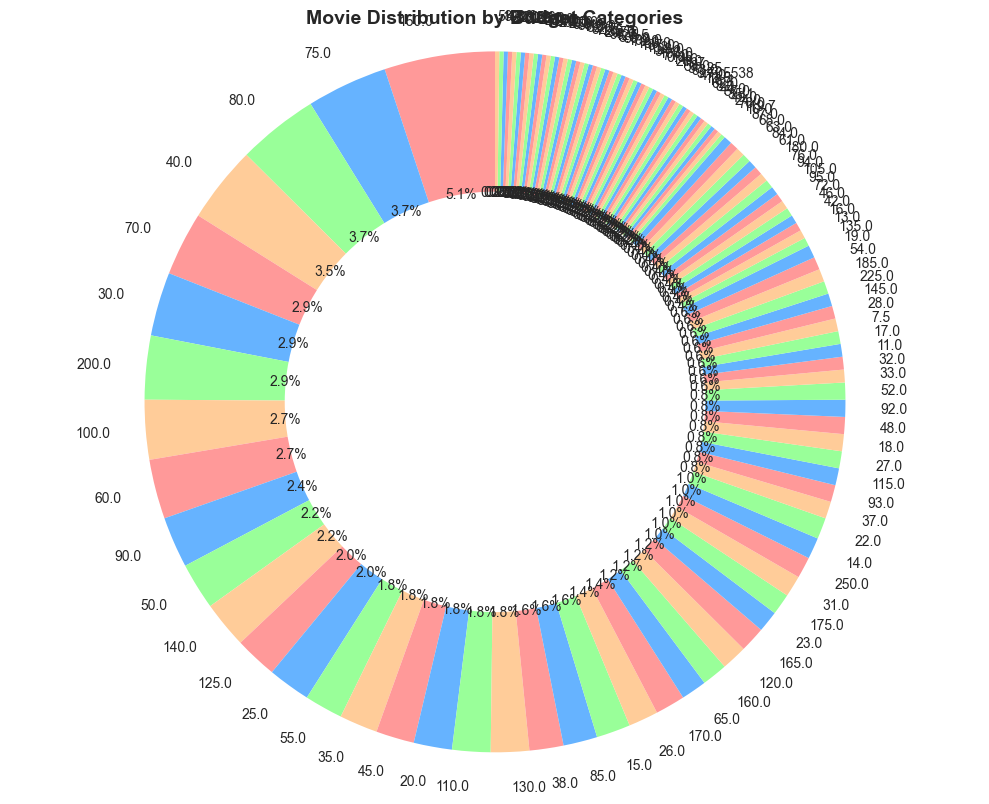

In [25]:
# 11. DONUT CHART - Budget Categories
plt.figure(figsize=(10, 8))
budget_counts = df['Budget_Million'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
wedges, texts, autotexts = plt.pie(budget_counts.values, labels=budget_counts.index, 
                                  autopct='%1.1f%%', colors=colors, startangle=90)
# Create donut by adding a white circle in center
centre_circle = plt.Circle((0,0), 0.60, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Movie Distribution by Budget Categories', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

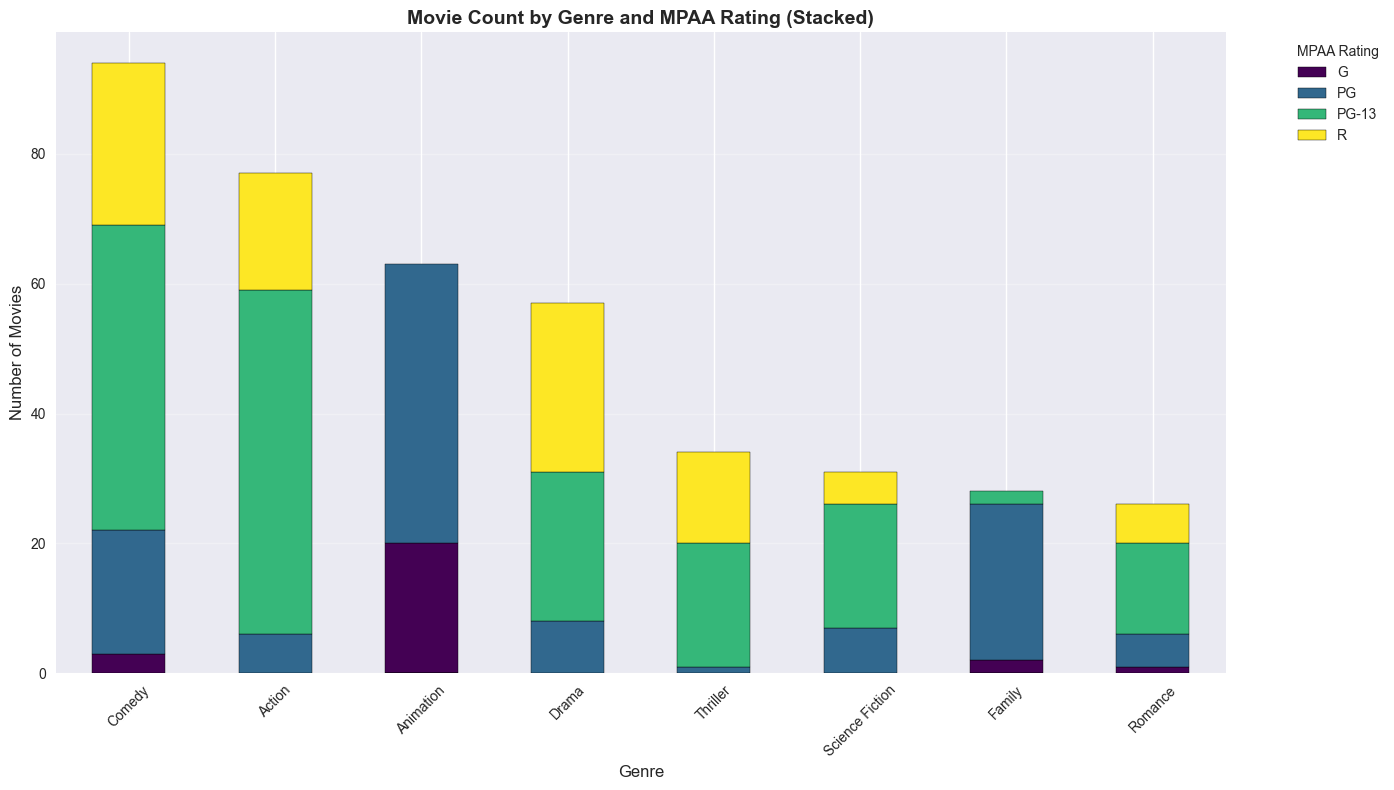

In [26]:
# 12. STACKED BAR CHART - Genre Count by MPAA Rating
plt.figure(figsize=(14, 8))
genre_mpaa = pd.crosstab(df['Primary_Genre'], df['MPAA Rating'])
top_8_genres = df['Primary_Genre'].value_counts().head(8).index
genre_mpaa_top = genre_mpaa.loc[top_8_genres]
genre_mpaa_top.plot(kind='bar', stacked=True, figsize=(14, 8), 
                   colormap='viridis', edgecolor='black')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Movie Count by Genre and MPAA Rating (Stacked)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='MPAA Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

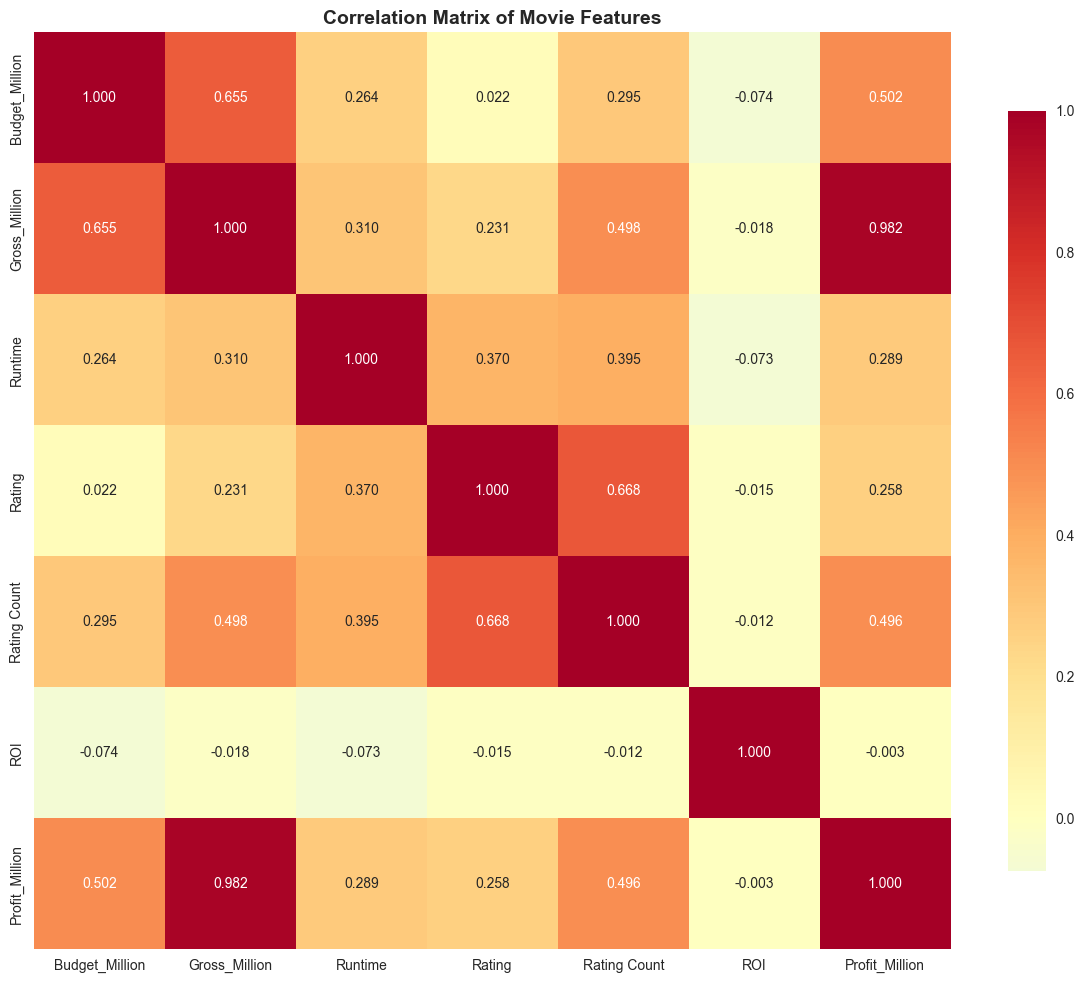

In [27]:
# 13. HEATMAP - Correlation Matrix
plt.figure(figsize=(12, 10))
numeric_cols = ['Budget_Million', 'Gross_Million', 'Runtime', 'Rating', 'Rating Count', 'ROI', 'Profit_Million']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Movie Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

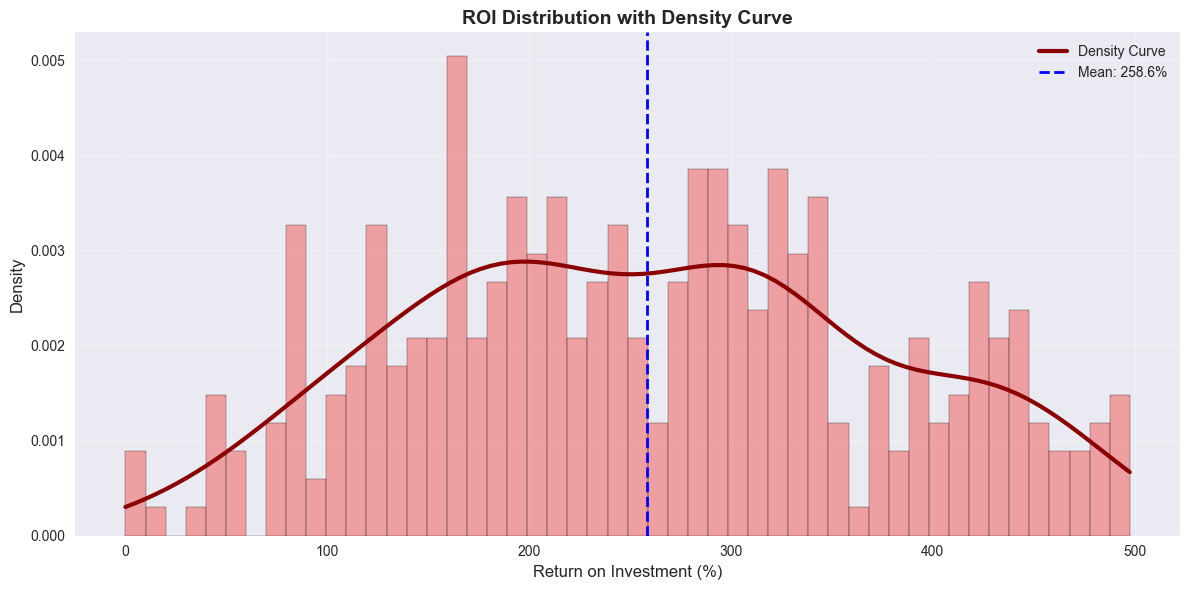

In [28]:
# 14. DENSITY PLOT - ROI Distribution
plt.figure(figsize=(12, 6))
roi_clean = df[df['ROI'] <= 500]  # Remove extreme outliers
plt.hist(roi_clean['ROI'], bins=50, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
# Add density curve
from scipy import stats
x = np.linspace(roi_clean['ROI'].min(), roi_clean['ROI'].max(), 100)
kde = stats.gaussian_kde(roi_clean['ROI'])
plt.plot(x, kde(x), linewidth=3, color='darkred', label='Density Curve')
plt.xlabel('Return on Investment (%)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('ROI Distribution with Density Curve', fontsize=14, fontweight='bold')
plt.axvline(roi_clean['ROI'].mean(), color='blue', linestyle='--', linewidth=2,
           label=f'Mean: {roi_clean["ROI"].mean():.1f}%')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

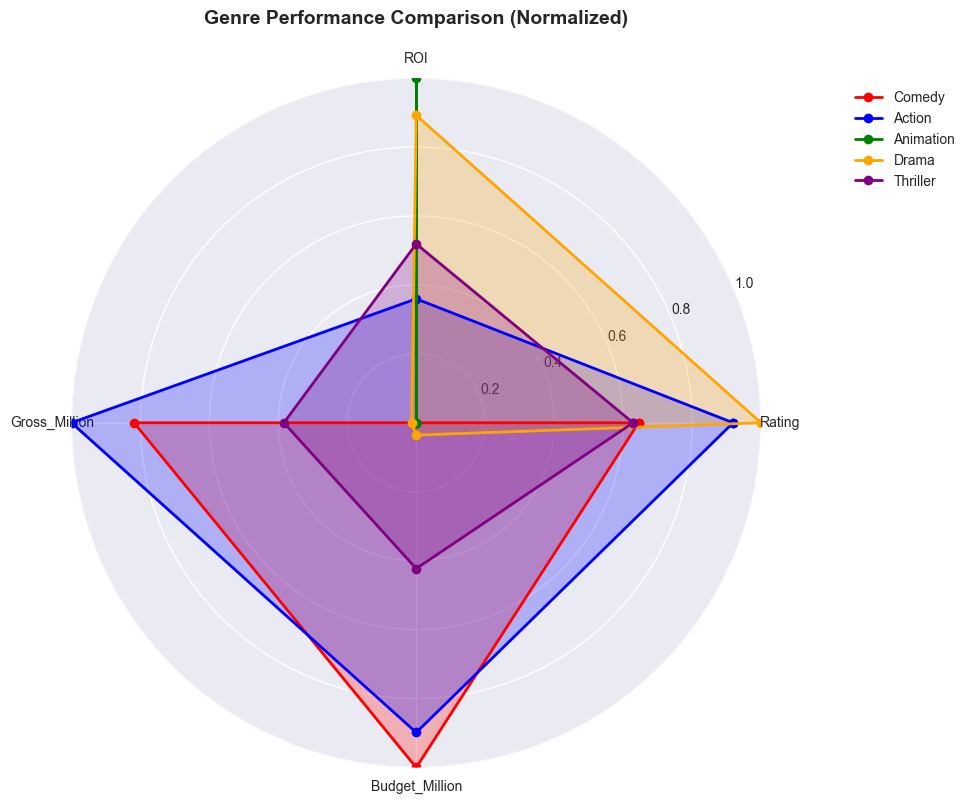

In [34]:
# 16. RADAR CHART - Average Performance by Genre
plt.figure(figsize=(10, 10))
top_5_genres = df['Primary_Genre'].value_counts().head(5).index
genre_performance = df[df['Primary_Genre'].isin(top_5_genres)].groupby('Primary_Genre').agg({
    'Rating': 'mean',
    'ROI': 'mean', 
    'Gross_Million': 'mean',
    'Budget_Million': 'mean'
}).round(2)

# Normalize the data for radar chart
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(genre_performance.values)

angles = np.linspace(0, 2*np.pi, len(genre_performance.columns), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, genre in enumerate(top_5_genres):
    values = normalized_data[i].tolist()
    values += values[:1]  # Complete the circle
    ax.plot(angles, values, 'o-', linewidth=2, label=genre, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(genre_performance.columns)
ax.set_ylim(0, 1)
ax.set_title('Genre Performance Comparison (Normalized)', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()



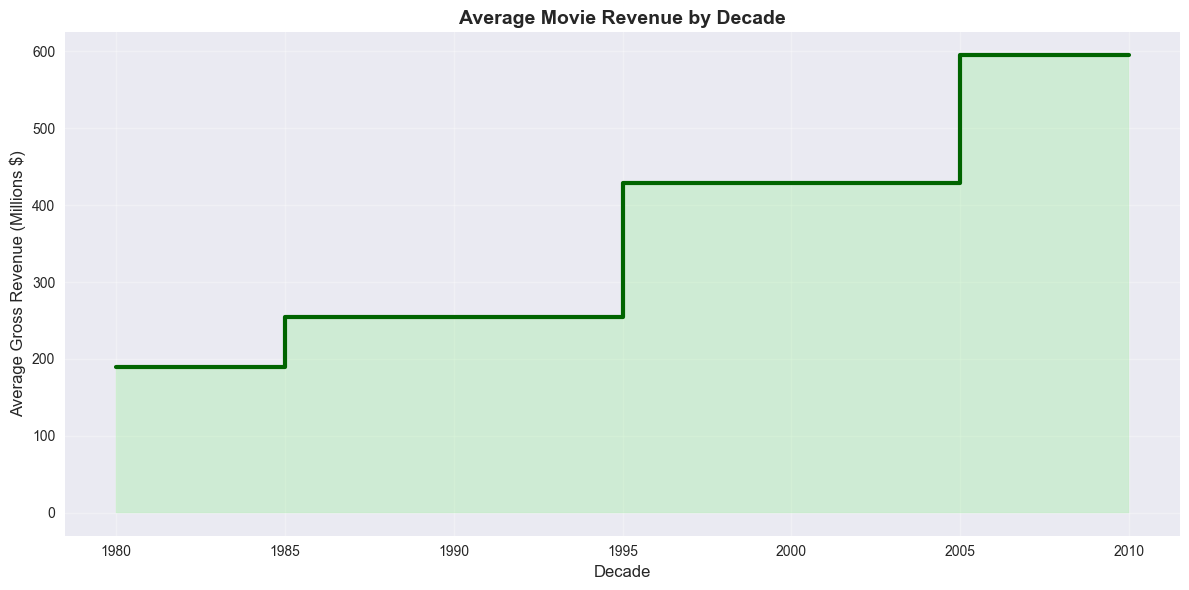

In [35]:
# 17. STEP PLOT - Revenue Growth Over Decades
plt.figure(figsize=(12, 6))
df['Decade'] = (df['Year'] // 10) * 10
decade_revenue = df.groupby('Decade')['Gross_Million'].mean().sort_index()
plt.step(decade_revenue.index, decade_revenue.values, where='mid', linewidth=3, color='darkgreen')
plt.fill_between(decade_revenue.index, decade_revenue.values, step='mid', alpha=0.3, color='lightgreen')
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Gross Revenue (Millions $)', fontsize=12)
plt.title('Average Movie Revenue by Decade', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [36]:
# Correlation Analysis
print("CORRELATION ANALYSIS:")
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:  # Strong correlation threshold
            strong_corr.append((correlation_matrix.columns[i], 
                              correlation_matrix.columns[j], corr_val))

print("Strong Correlations (>0.3):")
for col1, col2, corr in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
    print(f"{col1} <-> {col2}: {corr:.3f}")

CORRELATION ANALYSIS:
Strong Correlations (>0.3):
Gross_Million <-> Profit_Million: 0.982
Rating <-> Rating Count: 0.668
Budget_Million <-> Gross_Million: 0.655
Budget_Million <-> Profit_Million: 0.502
Gross_Million <-> Rating Count: 0.498
Rating Count <-> Profit_Million: 0.496
Runtime <-> Rating Count: 0.395
Runtime <-> Rating: 0.370
Gross_Million <-> Runtime: 0.310


In [37]:
# Genre Performance Analysis
print("\nGENRE PERFORMANCE ANALYSIS:")
genre_stats = df.groupby('Primary_Genre').agg({
    'Gross_Million': ['mean', 'median', 'count'],
    'Budget_Million': 'mean',
    'ROI': 'mean',
    'Rating': 'mean'
}).round(2)

genre_stats.columns = ['Avg_Gross', 'Median_Gross', 'Count', 'Avg_Budget', 'Avg_ROI', 'Avg_Rating']
genre_stats = genre_stats.sort_values('Avg_Gross', ascending=False)
print(genre_stats.head(10))

# MPAA Rating Analysis
print("\nMPAA RATING ANALYSIS:")
mpaa_stats = df.groupby('MPAA Rating').agg({
    'Gross_Million': 'mean',
    'Budget_Million': 'mean', 
    'ROI': 'mean',
    'Rating': 'mean',
    'Title': 'count'
}).round(2)
mpaa_stats.columns = ['Avg_Gross', 'Avg_Budget', 'Avg_ROI', 'Avg_Rating', 'Count']
print(mpaa_stats)


GENRE PERFORMANCE ANALYSIS:
                 Avg_Gross  Median_Gross  Count  Avg_Budget  Avg_ROI  \
Primary_Genre                                                          
Fantasy             780.62        886.30     22      152.71   469.31   
Adventure           601.38        432.49     26      126.92   395.98   
Animation           525.81        497.37     63      113.98   447.68   
Action              472.71        378.88     77      121.36   363.65   
Science Fiction     439.04        408.25     31      108.42   326.71   
Romance             387.80        302.73     26       46.35   969.77   
War                 374.19        452.99      8       89.60   492.40   
Mystery             366.69        334.27     10       98.90   286.00   
Thriller            345.48        357.84     34       79.44   484.91   
Western             296.62        252.28      5       68.80   756.99   

                 Avg_Rating  
Primary_Genre                
Fantasy                7.44  
Adventure       